In [41]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [9]:
x_train = catalog.load('uci_wine_quality_1.x_train')
y_train = catalog.load('uci_wine_quality_1.y_train')

x_test = catalog.load('uci_wine_quality_1.x_test')
y_test = catalog.load('uci_wine_quality_1.y_test')
model = catalog.load('uci_wine_quality_1.model')

2021-12-06 07:30:47,292 - kedro.io.data_catalog - INFO - Loading data from `uci_wine_quality_1.x_train` (UCIDataSet)...
2021-12-06 07:30:47,313 - kedro.io.data_catalog - INFO - Loading data from `uci_wine_quality_1.y_train` (UCIDataSet)...
2021-12-06 07:30:47,332 - kedro.io.data_catalog - INFO - Loading data from `uci_wine_quality_1.x_test` (UCIDataSet)...
2021-12-06 07:30:47,347 - kedro.io.data_catalog - INFO - Loading data from `uci_wine_quality_1.y_test` (UCIDataSet)...
2021-12-06 07:30:47,363 - kedro.io.data_catalog - INFO - Loading data from `uci_wine_quality_1.model` (TFBoostDataSet)...


In [12]:
model_tree = catboost.CatBoostRegressor(loss_function='RMSEWithUncertainty')
model_tree.fit(x_train, y_train, verbose=False)

In [30]:
y_test_catboost = model_tree.predict(x_test)
y_test_catboost_treeflow = model.tree_model.predict(x_test)

y_test_samples = model.sample(x_test, num_samples=500)
y_test_samples = y_test_samples.squeeze()

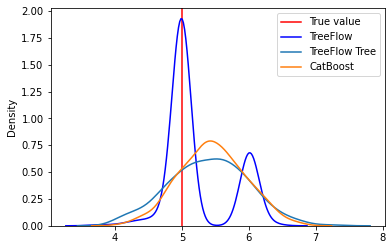

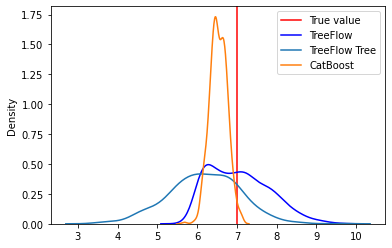

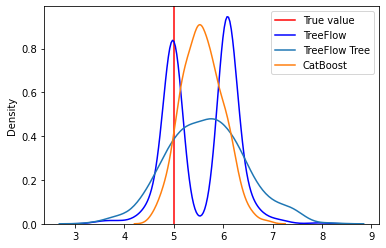

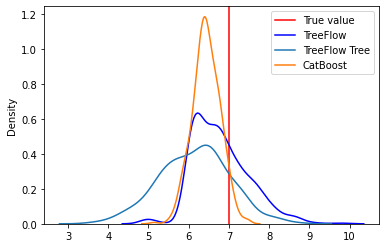

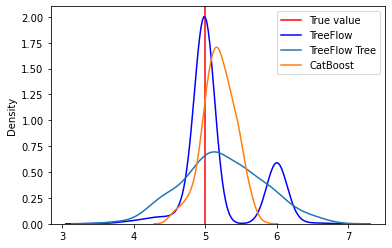

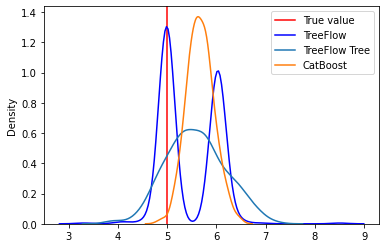

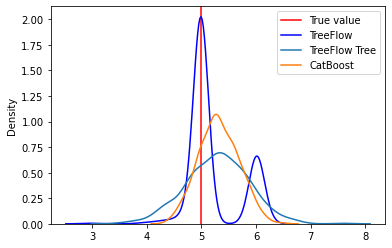

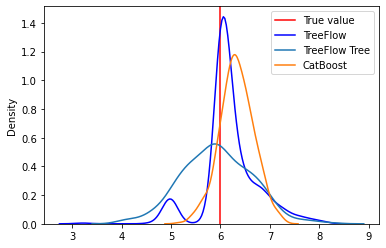

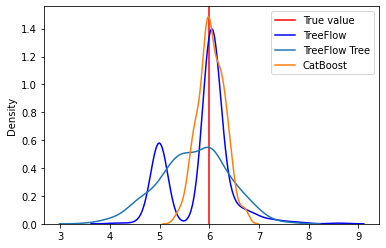

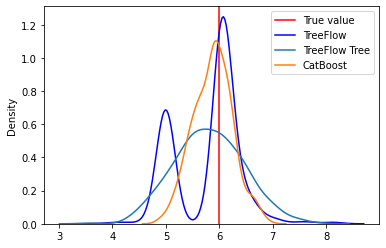

In [43]:
for i in range(len(y_test))[:10]:
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')
    sns.kdeplot(stats.norm.rvs(loc=y_test_catboost_treeflow[i, 0], scale=np.sqrt(y_test_catboost_treeflow[i, 1]), size=500), label='TreeFlow Tree')
    sns.kdeplot(stats.norm.rvs(loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1]), size=500), label='CatBoost')
    
    plt.legend()
    plt.show()